# Library and Data Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [3]:
data = pd.read_csv("row_data.csv")

In [4]:
data.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [5]:
data.shape

(1259, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# Data Cleaning

In [7]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
missing_data

,Total,Percent
comments,1095,0.869738
state,515,0.409055
work_interfere,264,0.209690
self_employed,18,0.014297
seek_help,0,0.000000
obs_consequence,0,0.000000
mental_vs_physical,0,0.000000
phys_health_interview,0,0.000000
mental_health_interview,0,0.000000
supervisor,0,0.000000


In [8]:
#dealing with missing data
data.drop(['comments'], axis= 1, inplace=True)
data.drop(['state'], axis= 1, inplace=True)
data.drop(['Timestamp'], axis= 1, inplace=True)

data.isnull().sum().max() #just checking that there's no missing data missing...
data.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [9]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in data:
    if feature in intFeatures:
        data[feature] = data[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        data[feature] = data[feature].fillna(defaultString)
    elif feature in floatFeatures:
        data[feature] = data[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [10]:
#Clean 'Gender'
gender = data['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [11]:
#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in data.iterrows():

    if str.lower(col.Gender) in male_str:
        data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        data['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

print(data['Gender'].unique())

C:\Users\Hi\AppData\Local\Temp\ipykernel_12276\3554881955.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
C:\Users\Hi\AppData\Local\Temp\ipykernel_12276\3554881955.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

['female' 'male' 'trans']


In [12]:
#complete missing age with mean
data['Age'].fillna(data['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(data['Age'])
s[s<18] = data['Age'].median()
data['Age'] = s
s = pd.Series(data['Age'])
s[s>120] = data['Age'].median()
data['Age'] = s

#Ranges of Age
data['age_range'] = pd.cut(data['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

C:\Users\Hi\AppData\Local\Temp\ipykernel_12276\693238367.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace = True)


In [13]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
data['self_employed'] = data['self_employed'].replace([defaultString], 'No')
print(data['self_employed'].unique())

['No' 'Yes']


In [14]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

data['work_interfere'] = data['work_interfere'].replace([defaultString], 'Don\'t know' )
print(data['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


# Encoding Data

In [15]:
#Encoding data
from sklearn.preprocessing import LabelEncoder

labelDict = {}
for feature in data:
    le = LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

In [16]:
#Get rid of 'Country'
data = data.drop(['Country'], axis= 1)
data.tail()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
1254,8,1,0,0,1,0,2,0,1,1,...,2,1,1,1,1,1,1,0,0,1
1255,14,1,0,1,1,2,2,1,1,2,...,1,1,1,1,2,1,1,2,0,2
1256,16,1,0,1,1,4,5,0,1,2,...,1,2,2,0,0,1,1,1,0,2
1257,28,0,0,0,0,0,1,1,1,1,...,0,2,1,0,0,1,1,1,0,2
1258,7,1,0,1,1,4,2,0,0,2,...,0,0,1,1,0,1,1,0,0,1


In [17]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
missing_data

,Total,Percent
Age,0,0.0
Gender,0,0.0
obs_consequence,0,0.0
mental_vs_physical,0,0.0
phys_health_interview,0,0.0
mental_health_interview,0,0.0
supervisor,0,0.0
coworkers,0,0.0
phys_health_consequence,0,0.0
mental_health_consequence,0,0.0


# Features Scaling

In [18]:
# Features Scaling: We're going to scale age, because it is extremely different from the other ones.

In [19]:
#Covariance Matrix. Variability comparison between categories of variables

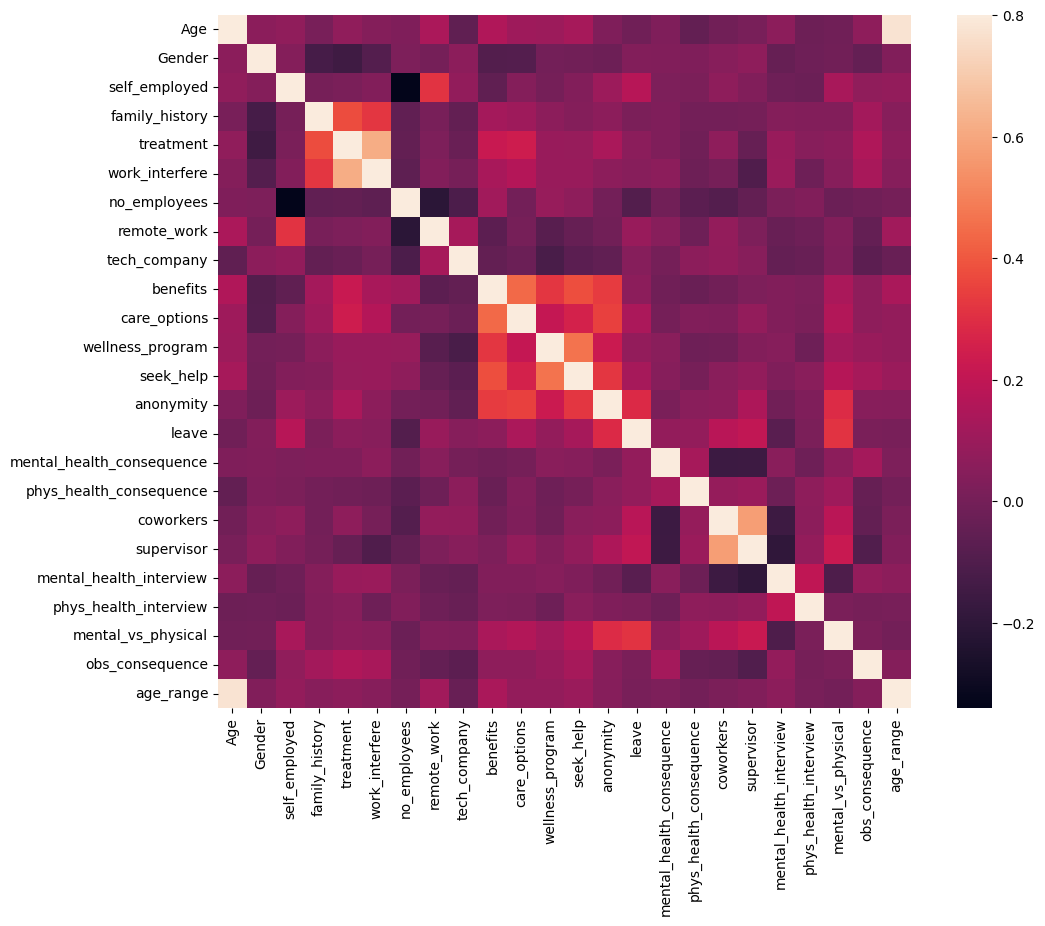

In [20]:
# correlation matrix

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

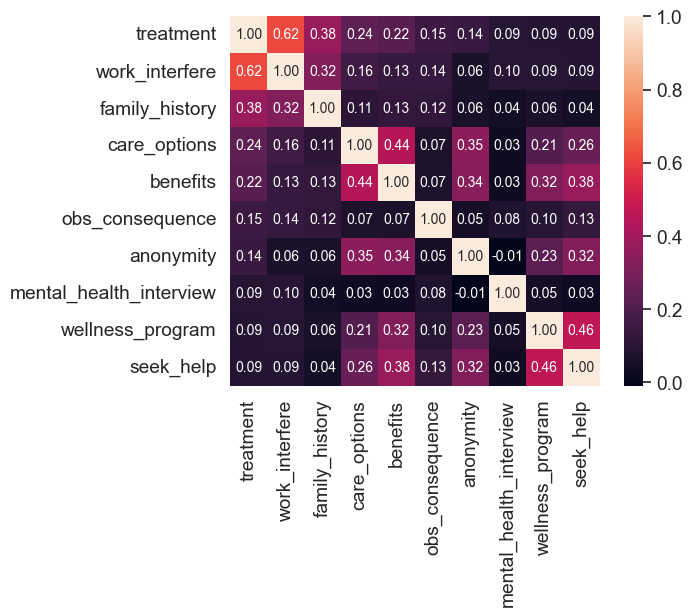

In [21]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Distribution** and density by Age

C:\Users\Hi\AppData\Local\Temp\ipykernel_12276\2342876230.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"], bins=24)


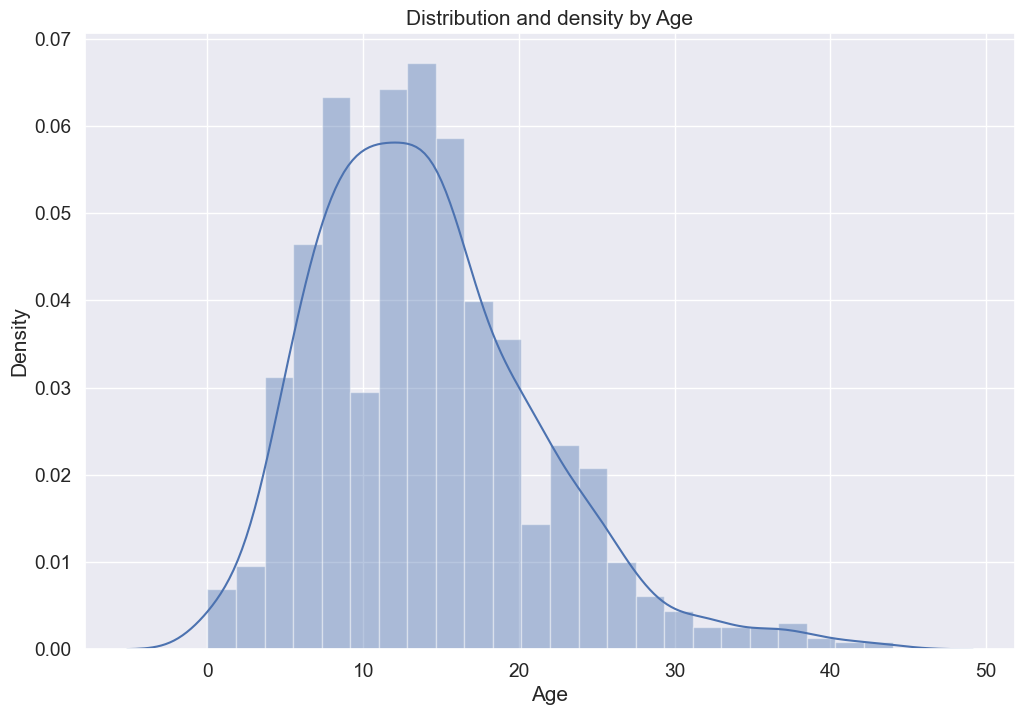

In [22]:
# Distribution and density by Age
plt.figure(figsize = (12,8))
sns.distplot(data["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")
plt.show()

c:\Users\Hi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Hi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

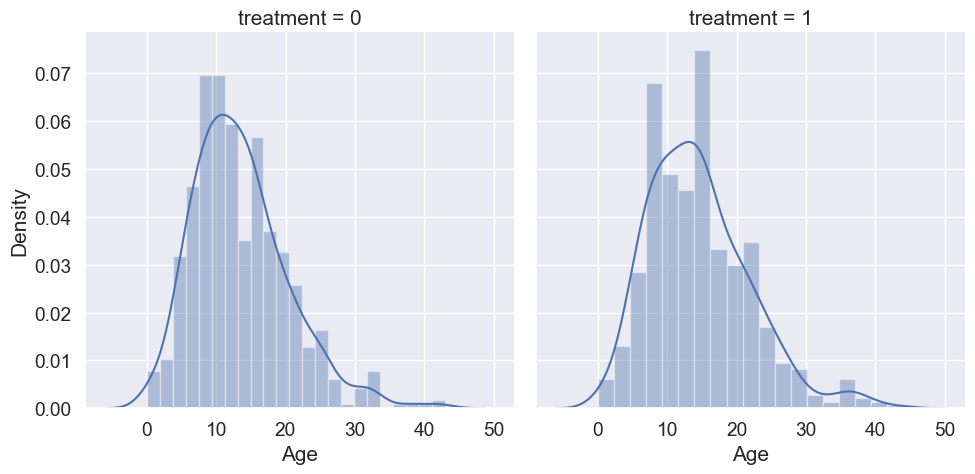

In [23]:
g = sns.FacetGrid(data, col='treatment', height=5)
g = g.map(sns.distplot, "Age")


How many people has been treated?

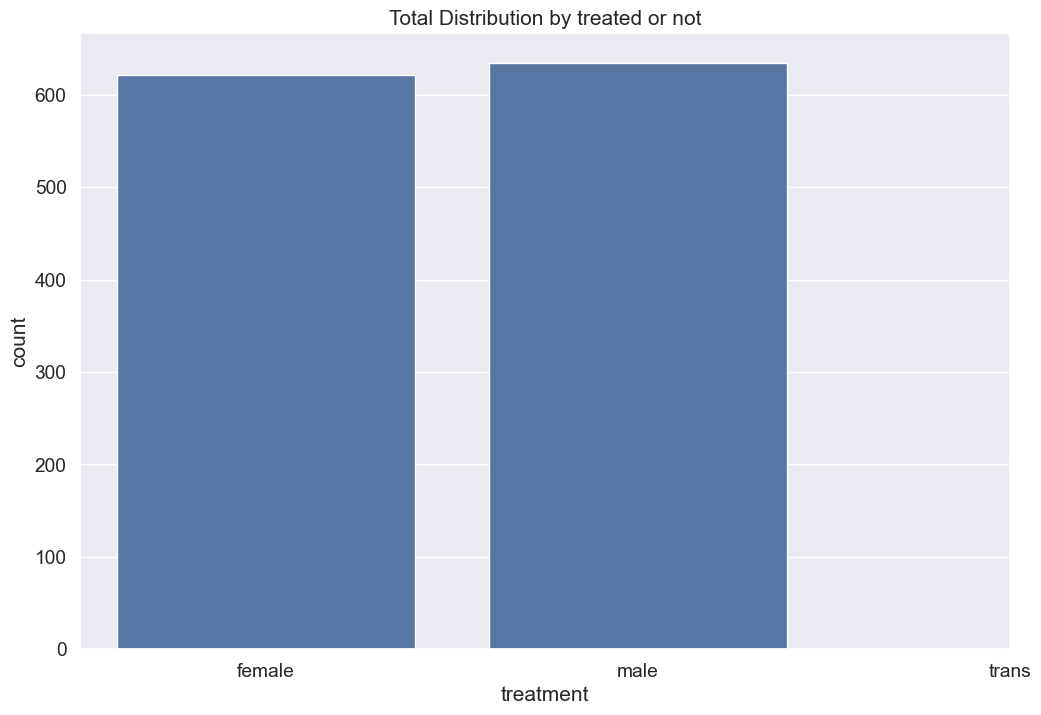

In [24]:
# Assuming labelDict is a dictionary containing labels for 'label_Gender'

labels = labelDict['label_Gender']

plt.figure(figsize=(12, 8))
g = sns.countplot(x = "treatment", data = data)
g.set_xticks(range(len(labels)))  # Setting the tick locations
g.set_xticklabels(labels)
plt.title('Total Distribution by treated or not')
plt.show()


Nested barplot to show probabilities for class and sex

C:\Users\Hi\AppData\Local\Temp\ipykernel_12276\3192892199.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="age_range", y="treatment", hue="Gender", data = data, kind="bar", ci=None, height=8, aspect=2, legend_out=True)


<Figure size 1200x800 with 0 Axes>

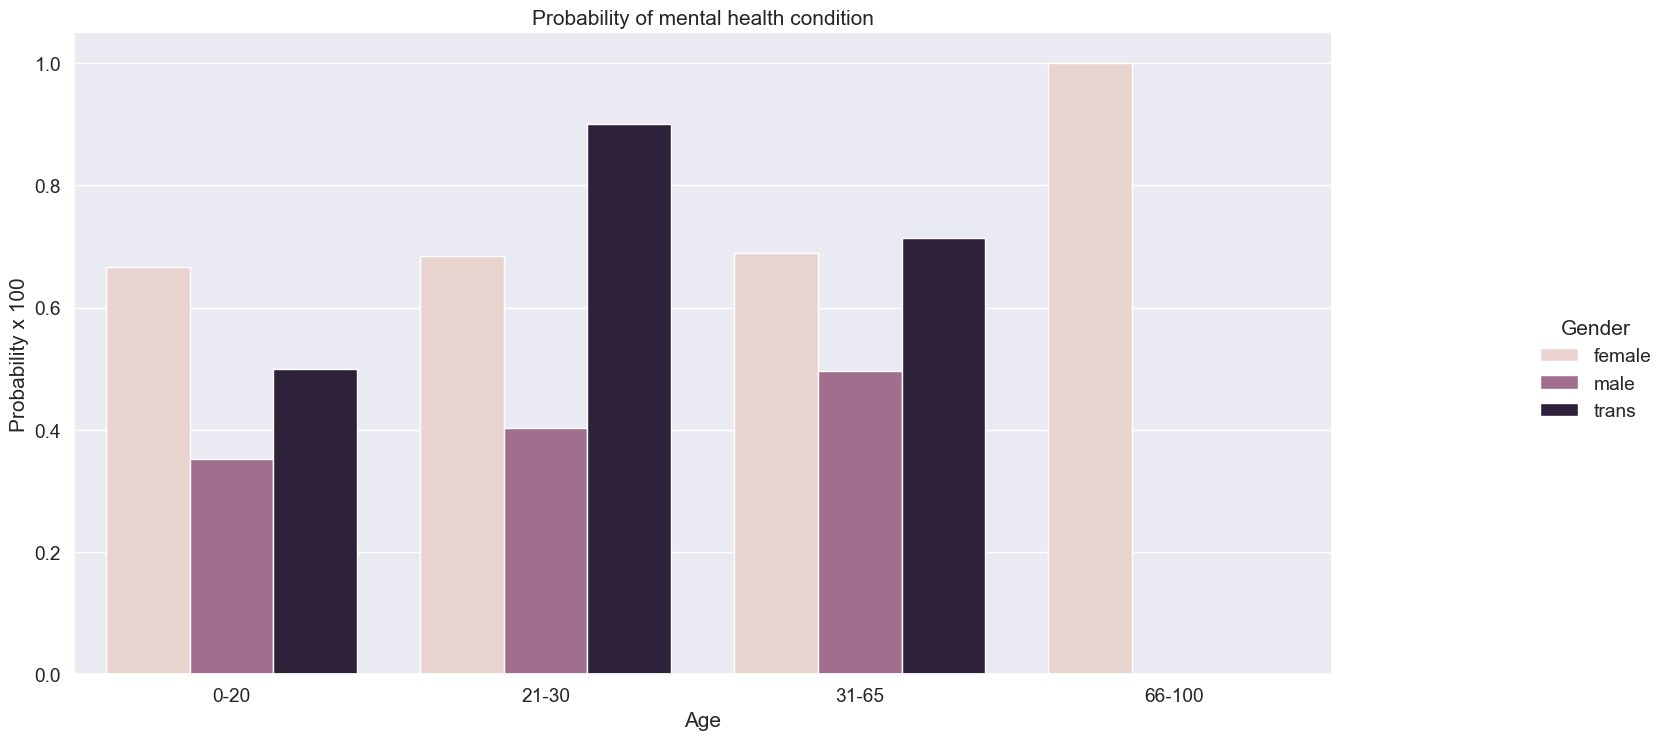

In [25]:
# Assuming labelDict is a dictionary containing labels for 'label_age_range' and 'label_Gender'

o = labelDict['label_age_range']
new_labels = labelDict['label_Gender']

plt.figure(figsize=(12, 8))
g = sns.catplot(x="age_range", y="treatment", hue="Gender", data = data, kind="bar", ci=None, height=8, aspect=2, legend_out=True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels
for t, l in zip(g.legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


Barplot to show probabilities for family history

C:\Users\Hi\AppData\Local\Temp\ipykernel_12276\1448409327.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="family_history", y="treatment", hue="Gender", data = data, kind="bar", ci=None, height = 8, aspect=2, legend_out=True)


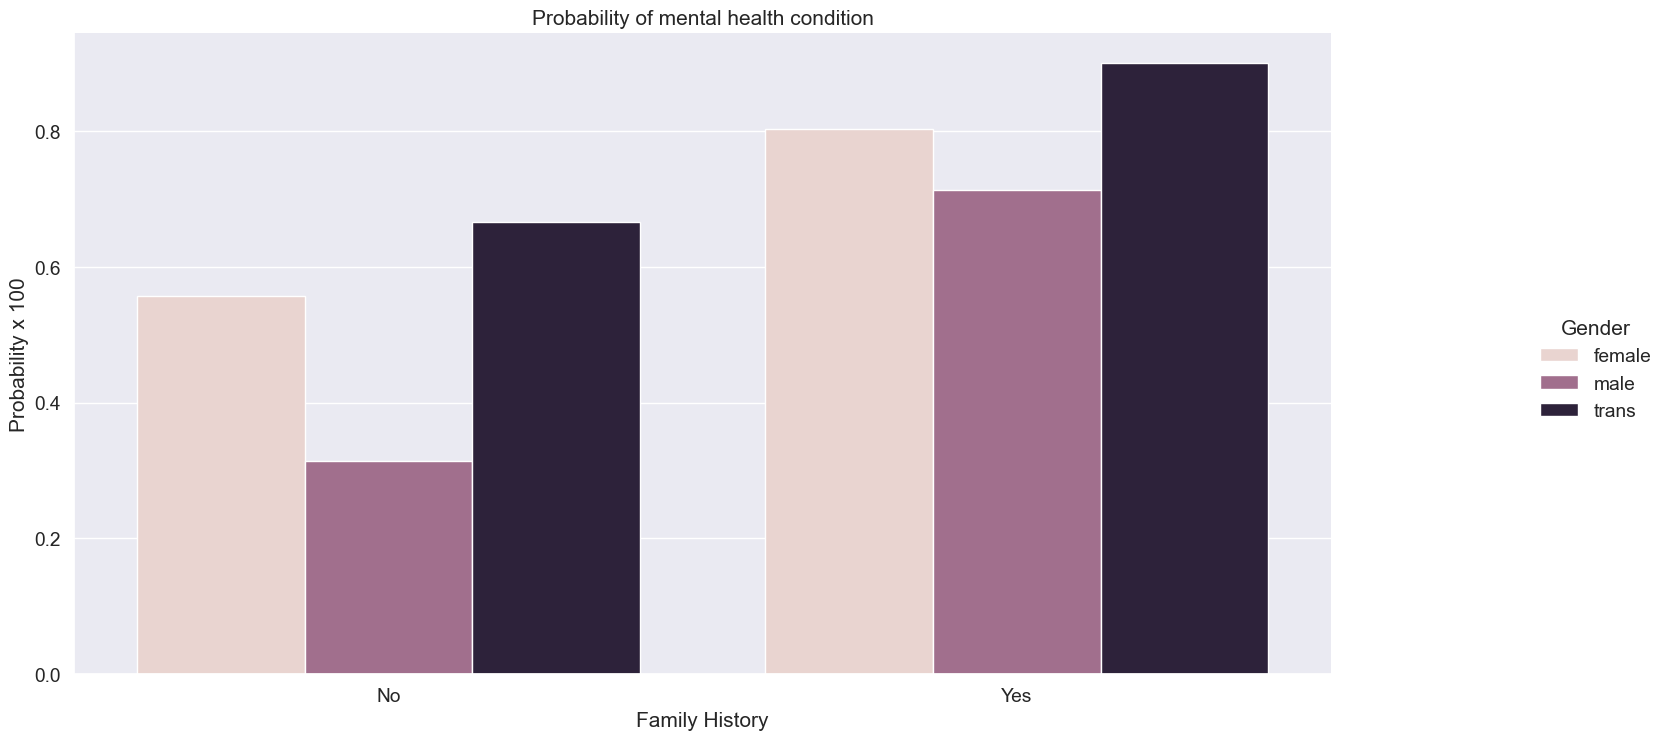

In [26]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data = data, kind="bar", ci=None, height = 8, aspect=2, legend_out=True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

Barplot to show probabilities for care options

C:\Users\Hi\AppData\Local\Temp\ipykernel_12276\4268795675.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="care_options", y="treatment", hue="Gender", data = data, kind="bar", ci=None, height=8, aspect=2, legend_out=True)


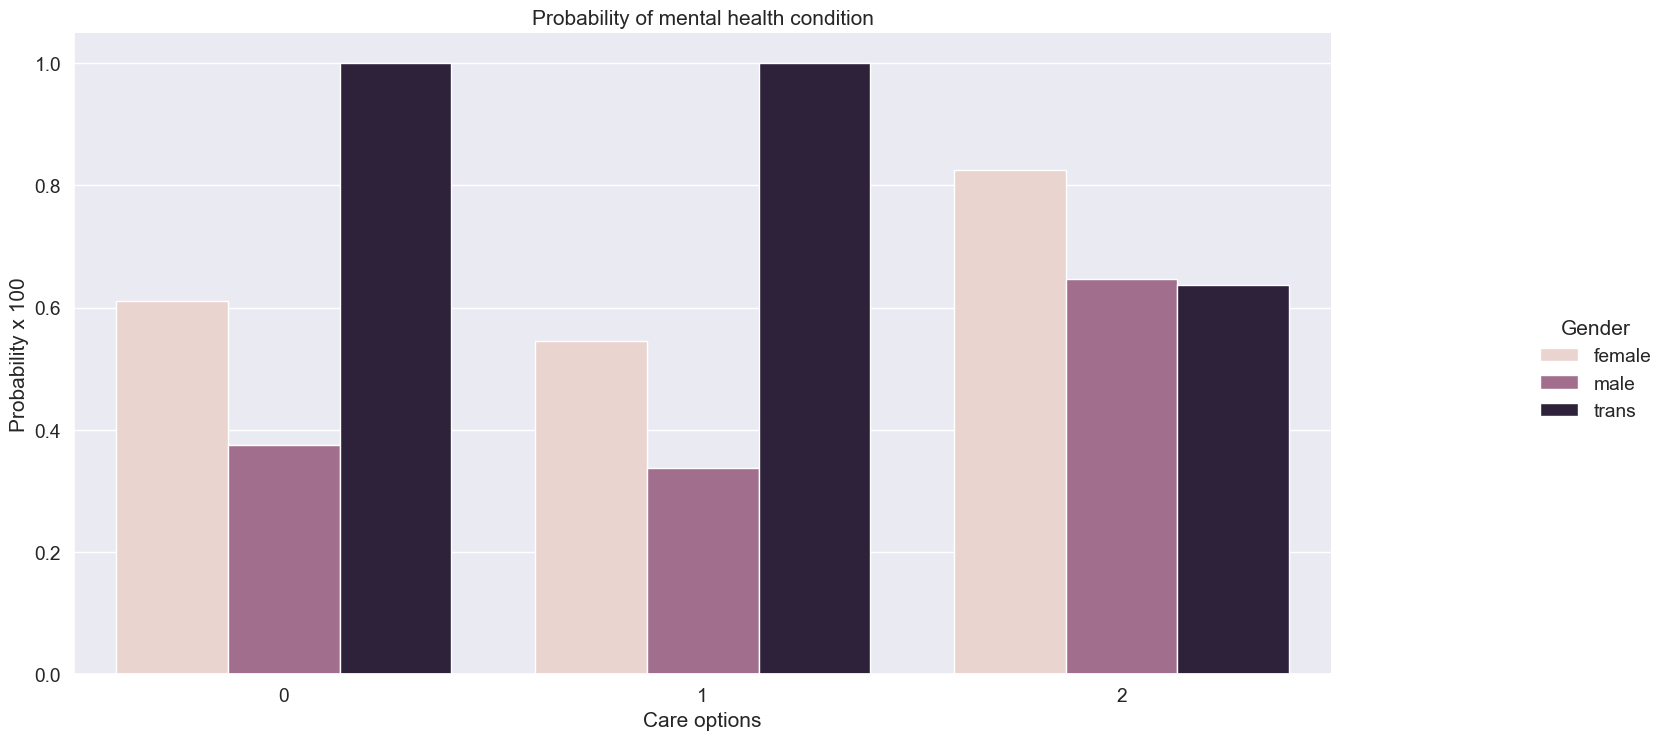

In [27]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data = data, kind="bar", ci=None, height=8, aspect=2, legend_out=True)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

Barplot to show probabilities for benefits

C:\Users\Hi\AppData\Local\Temp\ipykernel_12276\2340285008.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=data, kind="bar", ci=None, height=8, aspect=2, legend_out=True)


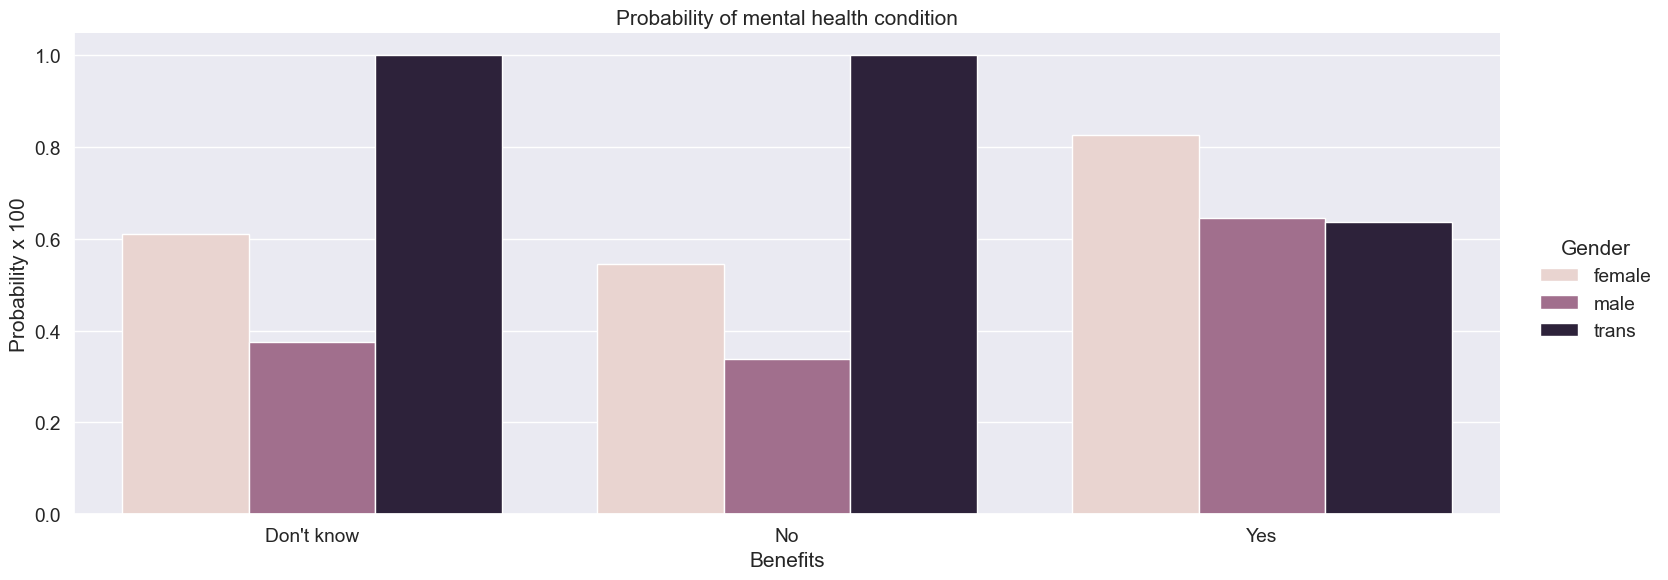

In [28]:
o = labelDict['label_benefits']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=data, kind="bar", ci=None, height=8, aspect=2, legend_out=True)

g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.7,right=0.9)
plt.show()

Barplot to show probabilities for work interfere

C:\Users\Hi\AppData\Local\Temp\ipykernel_12276\2886976406.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data = data, kind="bar", ci=None, height=7, aspect=2, legend_out=True)


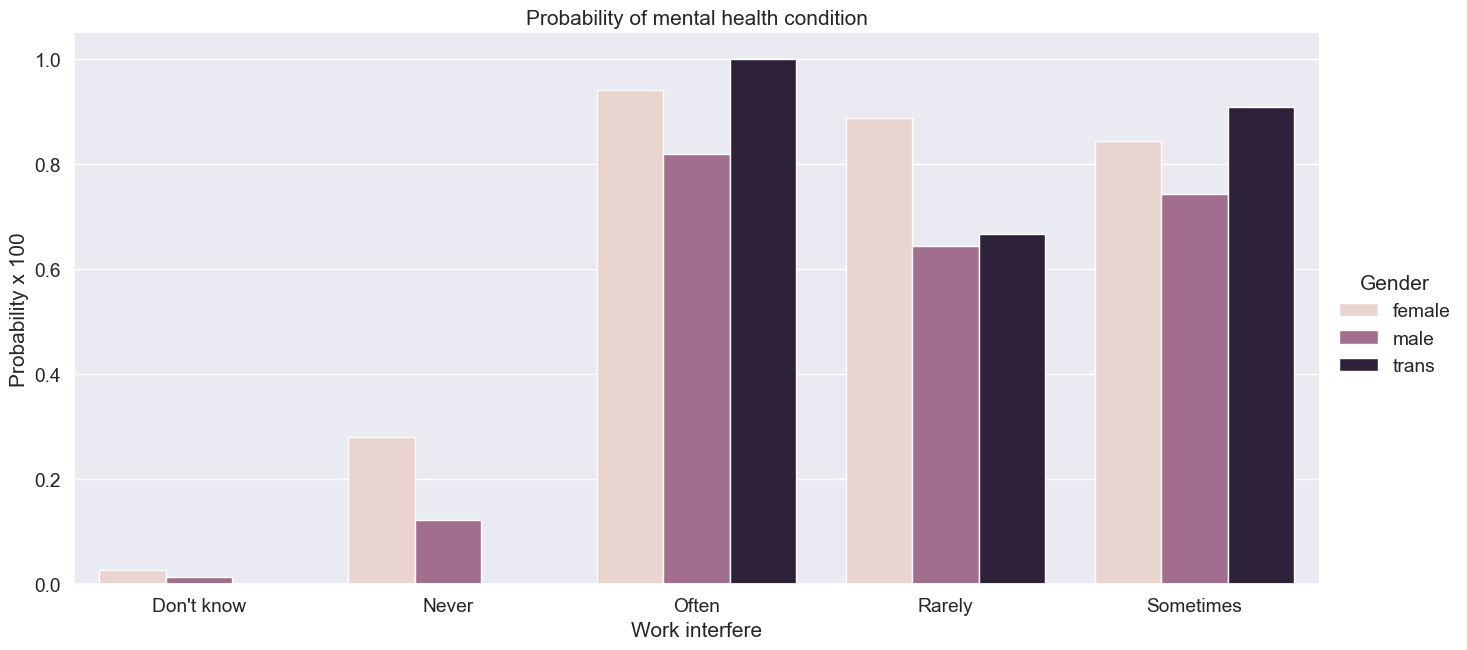

In [29]:
o = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data = data, kind="bar", ci=None, height=7, aspect=2, legend_out=True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.9)
plt.show()

# Scaling and Fitting

Features Scaling We're going to scale age, because is extremely different from the othere ones.

In [30]:
# Scaling Age
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1257 non-null   float64
 1   Gender                     1257 non-null   int32  
 2   self_employed              1257 non-null   int32  
 3   family_history             1257 non-null   int32  
 4   treatment                  1257 non-null   int32  
 5   work_interfere             1257 non-null   int32  
 6   no_employees               1257 non-null   int32  
 7   remote_work                1257 non-null   int32  
 8   tech_company               1257 non-null   int32  
 9   benefits                   1257 non-null   int32  
 10  care_options               1257 non-null   int32  
 11  wellness_program           1257 non-null   int32  
 12  seek_help                  1257 non-null   int32  
 13  anonymity                  1257 non-null   int32  
 1

# Spilitting Dataset

In [32]:
from sklearn.model_selection import train_test_split

# define X and y

feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']

X = data[feature_cols]
y = data.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

In [33]:
print(X.shape)

(1257, 8)


In [34]:
# # Generate a synthetic dataset for illustration
# from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=1200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Evaluating models

SVM Training Accuracy :  83.88059701492537
SVM Testing Accuracy : 80.55555555555556
Confusion Matrix (SVM):
 [[ 87  42]
 [  7 116]]
Precision (SVM): 0.7341772151898734
Recall (SVM): 0.943089430894309
F1 Score (SVM): 0.8256227758007118
ROC-AUC (SVM): 0.8087540177727359
MCC (SVM): 0.6382598913838063


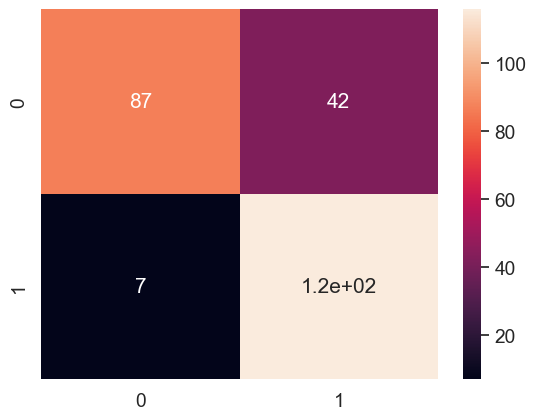

In [63]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, matthews_corrcoef

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf',probability=True, random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)*100
print("SVM Training Accuracy : ", svm_classifier.score(X_train, y_train)*100)
print("SVM Testing Accuracy :", accuracy_svm)

# Example evaluation metrics for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)

print("Confusion Matrix (SVM):\n", conf_matrix_svm)
print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 Score (SVM):", f1_svm)
print("ROC-AUC (SVM):", roc_auc_svm)
print("MCC (SVM):", mcc_svm)
sns.heatmap(conf_matrix_svm, annot = True)
plt.show()

In [64]:
import joblib
model = svm_classifier
joblib.dump(model, "mental_health_model.pkl")
joblib.dump(scaler, "scaler_age.pkl")

['scaler_age.pkl']

In [ ]:
| #  | Age | Gender | Family History | Benefits | Care Options | Anonymity | Leave          | Work Interfere | ✅ Expected Output              |
| -- | --- | ------ | -------------- | -------- | ------------ | --------- | -------------- | -------------- | ------------------------------ |
| 1  | 24  | Male   | Yes            | No       | Yes          | No        | Difficult      | Often          | 🧠 **Likely need treatment**   |
| 2  | 30  | Female | No             | Yes      | Yes          | Yes       | Easy           | Rarely         | 😊 **Unlikely need treatment** |
| 3  | 41  | Male   | Yes            | No       | No           | No        | Very Difficult | Often          | 🧠 **Likely need treatment**   |
| 4  | 28  | Female | Yes            | Yes      | Yes          | Yes       | Somewhat Easy  | Sometimes      | 🧠 **Likely need treatment**   |
| 5  | 35  | Male   | No             | Yes      | No           | No        | Difficult      | Never          | 😊 **Unlikely need treatment** |
| 6  | 22  | Male   | Yes            | No       | No           | No        | Very Difficult | Often          | 🧠 **Likely need treatment**   |
| 7  | 40  | Female | No             | Yes      | Yes          | Yes       | Easy           | Rarely         | 😊 **Unlikely need treatment** |
| 8  | 26  | Male   | Yes            | No       | No           | No        | Difficult      | Sometimes      | 🧠 **Likely need treatment**   |
| 9  | 33  | Female | No             | Yes      | Yes          | Yes       | Somewhat Easy  | Rarely         | 😊 **Unlikely need treatment** |
| 10 | 45  | Male   | Yes            | No       | No           | No        | Very Difficult | Often          | 🧠 **Likely need treatment**   |
